# SME0823 - Modelos de Regressão e Aprendizado Supervisionado II
# Avaliação 2
# Paulo Henrique Vedovatto Turquetti - 13750791
### Análises utilizando **'sneeze1.csv'**

Um estudo clínico busca investigar fatores associados ao número de espirros diários apresentados por indivíduos com rinite alérgica no período em que as plantas mais liberam o pólen no ar. Para cada participante, foram coletadas as seguintes variáveis:

* **nsneeze**: número de espirros observados em um dia (variável resposta de contagem).
* **alcohol**: consumo de bebida alcoólica nas 24 horas anteriores (0 = não, 1 = sim).
* **antihist**: uso de anti-histamínico no dia da observação (0 = não, 1 = sim).
* **smoker**: indicador de tabagismo (0 = não fumante, 1 = fumante).
* **age**: idade do paciente (anos).
* **pollen**: índice quantitativo de concentração de pólen no ar no dia da observação.


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


**6.** Separe os dados em dois subconjuntos, treinamento com 70% das observações e
teste com 30%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (deviance, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.


Utilize os códigos abaixo para iniciar suas análises.

Atenção: Se seu número USP

- termina com 0 ou 1, utilize os dados sneeze1
- termina com 2 ou 3, utilize os dados sneeze2
- termina com 4 ou 5, utilize os dados sneeze3
- termina com 6 ou 7, utilize os dados sneeze4
- termina com 8 ou 9, utilize os dados sneeze5

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/PTurquetti/P2_ModelosRegressao2/main/sneeze1.csv')
df = df.iloc[:, 1:]

df

,nsneeze,alcohol,antihist,smoker,age,pollen
0,6,0,1,1,80.0,43.279066
1,5,1,0,0,46.0,61.571050
2,0,0,1,0,20.0,24.281061
3,18,0,0,1,27.0,59.588401
4,5,0,0,0,48.0,32.727172
...,...,...,...,...,...,...
1195,72,0,0,1,51.0,110.470695
1196,6,0,0,0,65.0,45.704558
1197,8,0,0,0,59.0,20.381291
1198,31,0,0,1,20.0,31.376729


In [92]:
df.columns

Index(['nsneeze', 'alcohol', 'antihist', 'smoker', 'age', 'pollen'], dtype='object')

In [93]:
df.dtypes

nsneeze       int64
alcohol       int64
antihist      int64
smoker        int64
age         float64
pollen      float64
dtype: object

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nsneeze   1200 non-null   int64  
 1   alcohol   1200 non-null   int64  
 2   antihist  1200 non-null   int64  
 3   smoker    1200 non-null   int64  
 4   age       1200 non-null   float64
 5   pollen    1200 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 56.4 KB


# QUESTÃO 1

**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.


In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: title={'center': "BOXPLOT DE 'NSNEEZE'"}, xlabel='nsneeze'>

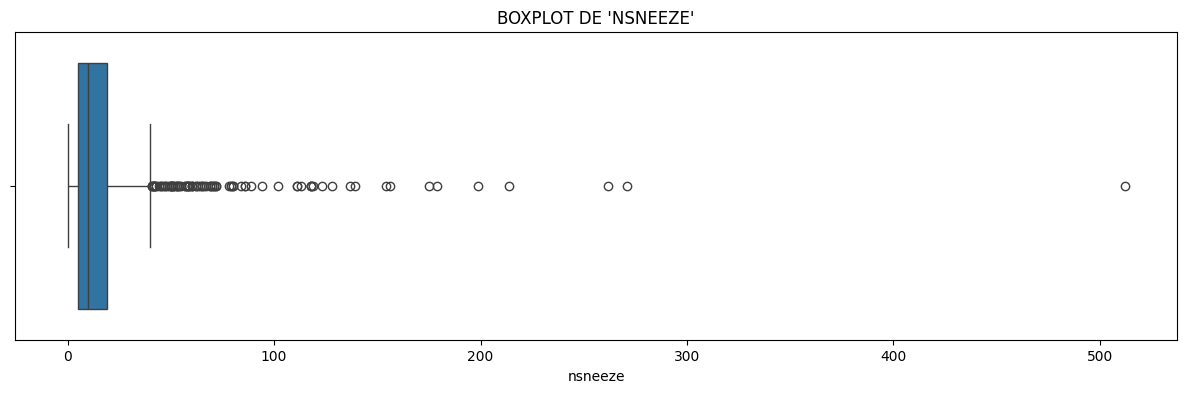

In [96]:
#ANALISANDO VARIÁVEL 'NSNEEZE'
plt.figure(figsize=(15, 4))
plt.title("Boxplot de 'nsneeze'".upper())
sns.boxplot(data=df['nsneeze'], orient='h')

<Axes: >

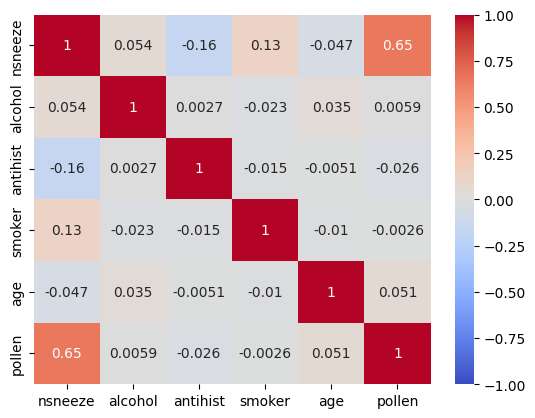

In [97]:
# ANÁLISE DE CORRELAÇÕES ENTRE VIRIÁVEIS E 'NSNEEZE'
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", vmin = -1, vmax = 1, annot = True)

Analisando as correlações, vemos que o único valor de correlação significativa ocorre entre as variáveis 'nsneeze' e 'pollen', com o valor de 0.65, indicando que quando 'pollen' aumenta, 'nsneeze' tende a aumentar também.

As outras variáveis não apresentaram correlação significativa, indicando que não existe uma relação linear clara entre elas

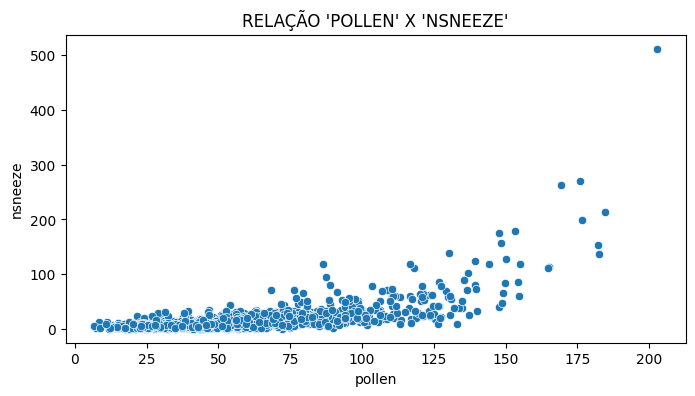

In [98]:
#ANALISANDO RELAÇÃO ENTRE NSNEEZE' E 'POLLEN'
plt.figure(figsize=(8, 4))
plt.title(f"relação 'pollen' x 'nsneeze'".upper())
sns.scatterplot(x=df['pollen'], y=df['nsneeze'])
plt.show()
    

In [99]:
binarias = ['alcohol', 'antihist', 'smoker']

AGRUPANDO DADOS DE ACORDO COM VARIÁVEIS BINÁRIAS E ANALIZANDO VALORES DE "NSNEEZE"

Agrupamento por alcohol


,count,mean,std,min,25%,50%,75%,max
alcohol,,,,,,,,
0,841.0,16.122473,27.928659,0.0,5.0,10.0,18.0,512.0
1,359.0,19.367688,26.496730,0.0,6.0,11.0,22.0,271.0


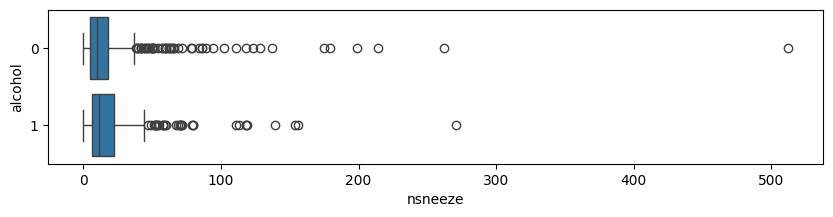

Agrupamento por antihist


,count,mean,std,min,25%,50%,75%,max
antihist,,,,,,,,
0,898.0,19.668151,30.541693,0.0,7.0,12.0,22.0,512.0
1,302.0,9.437086,12.736573,0.0,3.0,6.0,11.0,113.0


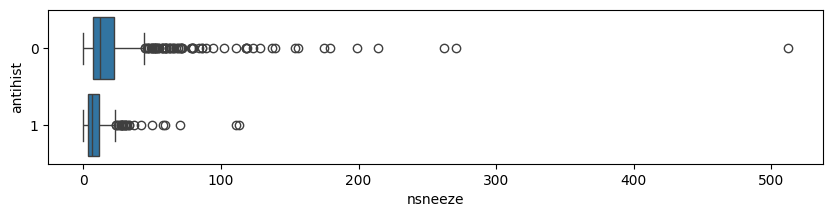

Agrupamento por smoker


,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
0,973.0,15.359712,26.906906,0.0,5.0,9.0,17.0,512.0
1,227.0,24.524229,28.997453,0.0,8.0,15.0,28.0,199.0


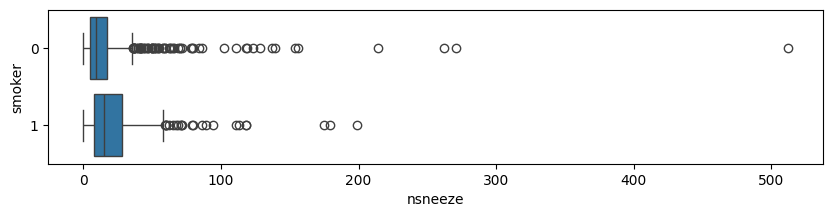

In [100]:
#ANALISANDO RELAÇÃO ENTRE VARIÁVEIS BINÁRIAS E 'NSNEEZE'
print('Agrupando dados de acordo com variáveis binárias e analizando valores de "nsneeze"\n'.upper())
for var in binarias:
    print(f"Agrupamento por {var}")
    display(df.groupby(var)["nsneeze"].describe())
    plt.figure(figsize=(10, 2))
    sns.boxplot(data=df, x='nsneeze', y=var, orient='h')
    plt.show()

 - **Consumo de álcool (alcohol)**
A comparação entre indivíduos que consumiram e que não consumiram bebidas alcoólicas nas 24 horas anteriores mostrou uma diferença moderada no número de espirros. A média de espirros foi ligeiramente maior entre os consumidores de álcool, embora a dispersão das observações tenha sido semelhante entre os grupos. Esse resultado sugere uma possível relação entre consumo de álcool e aumento de espirros, porém de magnitude relativamente pequena.

 - **Uso de anti-histamínicos (antihist)**
O uso de anti-histamínicos apresentou um efeito claro e consistente sobre a redução do número de espirros. Indivíduos que utilizaram o medicamento tiveram, em média, cerca de metade dos espirros observados em relação aos que não utilizaram, além de apresentarem menor variabilidade. Isso indica que o anti-histamínico atua como um fator protetor importante contra episódios de espirros, o que está alinhado com seu efeito farmacológico esperado.

 - **Tabagismo (smoker)**
O tabagismo mostrou uma associação forte e positiva com o aumento no número de espirros. Fumantes apresentaram valores médios e medianos consideravelmente maiores quando comparados aos não fumantes, o que sugere que o hábito de fumar contribui de maneira relevante para maior irritação das vias respiratórias e, consequentemente, mais episódios de espirros.

In [101]:
#ANALISANDO RELAÇÃO ENTRE 'NSNEEZE' E 'AGE'
bins = [0, 20, 40, 60, 120]
labels = ["0-20", "21-40", "41-60", "61+"]

df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, include_lowest=True)
df.groupby("age_group")["nsneeze"].describe()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9156\4016675896.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("age_group")["nsneeze"].describe()


,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
0-20,101.0,18.524752,30.772908,0.0,7.0,12.0,21.0,271.0
21-40,515.0,18.166990,31.032606,0.0,6.0,11.0,19.0,512.0
41-60,489.0,16.220859,23.063532,0.0,5.0,10.0,19.0,214.0
61+,95.0,14.242105,24.836793,0.0,3.0,7.0,16.0,199.0


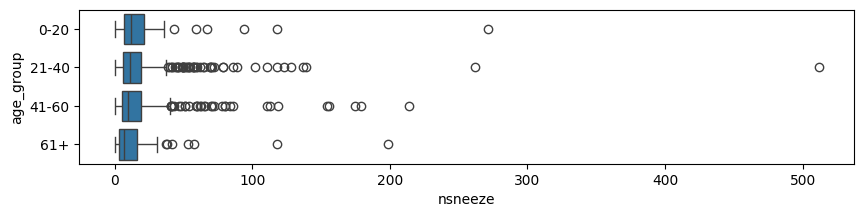

In [102]:
plt.figure(figsize=(10, 2))
sns.boxplot(data=df, y="age_group", x="nsneeze", orient='h')
plt.show()

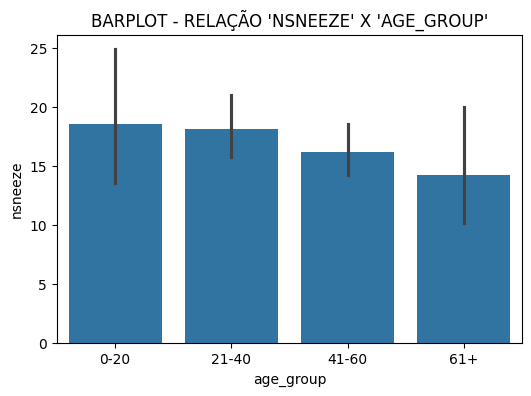

In [103]:
plt.figure(figsize=(6, 4))
plt.title("barplot - relação 'nsneeze' x 'age_group'".upper())
sns.barplot(x="age_group", y="nsneeze", data=df)
plt.show()

Analisando a relação entre a idade, podemos identificar uma relação que indica uma diminuição do número de espirros com o aumento da idade, algo que me surpreendeu. Apesar dessa relação ser suave, ela está presente nos dados

# QUESTÃO 2

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.


In [104]:
resposta = df['nsneeze']
preditoras = df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]

In [105]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [106]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

modelo_pois = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.Poisson()
)

ajuste_pois = modelo_pois.fit()
print(ajuste_pois.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1194
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4947.1
Date:                Mon, 01 Dec 2025   Deviance:                       4949.1
Time:                        22:22:46   Pearson chi2:                 5.04e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5560      0.026  

### Quanto à estimativa dos coeficientes

Aplicando o mpdelo de Poisson, obtemos os seguintes valores de coeficientes:

| Coeficiente | Variável  | Estimativa (βn)  |
|-------------|-----------|------------------|
| β0          | Intercepto| 1.5560           |
| β1          | alcohol   | 0.2191           |
| β2          | antihist  | -0.6449          |
| β3          | smoker    | 0.4639           |
| β4          | age       | -0.0114          |
| β5          | pollen    | 0.0229           |


Dessa forma, chegamos na equação


$$\log(\lambda) = \underbrace{0.9631}_{\beta_0} - \underbrace{0.0163}_{\beta_1} \cdot \text{alcohol} - \underbrace{0.4287}_{\beta_2} \cdot \text{antihist} + \underbrace{0.3032}_{\beta_3} \cdot \text{smoker} + \underbrace{0.0044}_{\beta_4} \cdot \text{age} + \underbrace{0.0076}_{\beta_5} \cdot \text{pollen}$$

Entre as variáveis com coeficientes positivos, temos *alcohol (β1 = +0.2191)*, *smoker (β3 = +0.4639)* e *pollen (β5 = +0.0229)*, indicando que o consumo de álcool e cigarro e a presença de polem aumentam o valor de espirros estimado. Da mesma forma, as variáveis *antihist (β2 = –0.6449)* e *age (β4 = –0.0114)* apresentaram um coeficiente negativo indicando que o modelo supõe que o uso de anti-histamínicos reduz a quantidade esperada de espirros e uma idade maior está associada a uma redução pequena no número de espirros.

Quanto a magitude dos coeficientes (anas=lisando valores absolutos), vemos que
 - O antihist tem o maior impacto absoluto (redução forte).
 - O segundo maior impacto é de smoker, aumentando espirros de forma considerável.
 - alcohol e pollen aumentam espirros, mas com efeitos menores.
 - age praticamente não altera muito (efeito pequeno, mas ainda assim negativo).


### Quanto à significância estatística

- Em relação ao **P-VALOR**: vemos que todas as variáveis obtiveram **p = 0 < 0.05**, indicando que as variáveis são altamente significativas, realmente influenciando o modelo

- Em relação ao **ERRO PADRÃO**: todos os erros padrão são muito pequenos, o que nos indica que o modelo estima os coeficientes com alta precisão. Destaca-se 'pollen' por obter um valor 0 (ou muito próximo disso), indicando que o modelo consegue estimar seu coeficiente com precisão quase absoluta

- Em relação à **ESTATÍSTICA Z**: todas as preditoras apresentaram um valor absoluto alto, indicando alta significância

- Em relação ao **INTERVALO DE CONFIANÇA [0.025 0.975]**: Nenhum valor está cruzando 0, ou seja, todos os intervalos estão completamente acima de zero ou completamente abaixo de zero. Além disso, todos os intervalos são estreitos, o que indica estimativas extremamente precisas, pouca incerteza e forte qualidade dos dados e do ajuste



# QUESTÃO 3

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


### Primeiro método: **ESTATÍSTICA DE DISPERSÃO**

In [107]:
# PRIMEIRO MÉTODO: ESTATÍSTICA DE DISPERSÃO
deviance = ajuste_pois.deviance
df_resid = ajuste_pois.df_resid

phi_deviance = deviance / df_resid
print("Estatística de dispersão (deviance / graus de liberdade) =".upper(),f'{phi_deviance:.2f}')


ESTATÍSTICA DE DISPERSÃO (DEVIANCE / GRAUS DE LIBERDADE) = 4.14


Quando calculamos a ESTATÍSTICA DE DISPERSÃO, analisamos o valor obtido segindo os critérios:

 - Se φ > 1, há superdispersão.
 - Se φ < 1, há subdispersão.

Como o valor obtido para nosso modelo poisson foi **4.14 > 1**, isso indica a existência de **superdispersão**. Isso significa que os dados têm mais variação do que o modelo de Poisson consegue explicar, tornando o modelo de poisson inadequado para os dados analisados

### Segundo método: Comparação com o Modelo Binomial Negativo - **TESTE DE RAZÃO DE VEROSSIMILHANÇA (LRT)**

In [108]:
# AJUSTANDO BINOMIAL NEGATIVO
ajuste_nb = smf.negativebinomial(formula=formula, data=df).fit()
print(ajuste_nb.summary())

Optimization terminated successfully.
         Current function value: 3.205985
         Iterations: 12
         Function evaluations: 19
         Gradient evaluations: 19
                     NegativeBinomial Regression Results                      
Dep. Variable:                nsneeze   No. Observations:                 1200
Model:               NegativeBinomial   Df Residuals:                     1194
Method:                           MLE   Df Model:                            5
Date:                Mon, 01 Dec 2025   Pseudo R-squ.:                  0.1708
Time:                        22:22:46   Log-Likelihood:                -3847.2
converged:                       True   LL-Null:                       -4639.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.561

In [109]:
# CALCULANDO ESTATISTICA DE TESTE DE RAZÃO VEROSSIMILHANÇA
from scipy.stats import chi2

ll_poi = ajuste_pois.llf
ll_nb = ajuste_nb.llf


# DIFERENÇA LOG-VEROSSIMILHIANÇA
delta_LL = ll_nb - ll_poi

# D
D_stat = 2 * delta_LL

alfa = 0.05
graus_lib = 1

print(f"Log-Verossimilhança do NB (ll_nb): {ll_nb:.4f}".upper())
print(f"Log-Verossimilhança do Poisson (LL_Poisson): {ll_poi:.4f}".upper())
print(f"Estatística Qui-Quadrado (D): {D_stat:.4f}".upper())

# P-VALOR
p_value = chi2.sf(D_stat, graus_lib)

# VALOR CRITICO PARA ALFA
critical_value = chi2.ppf(1 - alfa, graus_lib)
print('='*60)
print("Resultados do Teste de Razão de Verossimilhança (LRT)".upper())
print(f"P-valor: {p_value:.10f}")
print(f"Valor Crítico (alpha={alfa}): {critical_value:.4f}")

# INTERPRETAÇÃO COM BASE NO RESULTADO
if p_value < alfa:
    print(f"\nDecisão: Rejeitar H₀ (P-valor < {alfa}).")
    print("Conclusão: O modelo Binomial Negativo é significativamente melhor que o Poisson.")
    print("Há Fortes Indícios de Superdispersão. O modelo de Poisson é inadequado.")
else:
    print(f"\nDecisão: Não Rejeitar H₀ (P-valor >= {alfa}).")
    print("Conclusão: Não há evidência estatística de superdispersão.")

LOG-VEROSSIMILHANÇA DO NB (LL_NB): -3847.1818
LOG-VEROSSIMILHANÇA DO POISSON (LL_POISSON): -4947.1390
ESTATÍSTICA QUI-QUADRADO (D): 2199.9145
RESULTADOS DO TESTE DE RAZÃO DE VEROSSIMILHANÇA (LRT)
P-valor: 0.0000000000
Valor Crítico (alpha=0.05): 3.8415

Decisão: Rejeitar H₀ (P-valor < 0.05).
Conclusão: O modelo Binomial Negativo é significativamente melhor que o Poisson.
Há Fortes Indícios de Superdispersão. O modelo de Poisson é inadequado.


### Confirmação - Envelope de Resíduos

In [110]:
def envelope_poisson(fitted_model, X, title):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    sim_resid = []
    for _ in range(100):
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        y_sim = np.random.poisson(mu_sim)
        sim_model = sm.GLM(y_sim, X, family=sm.families.Poisson()).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, '.', label="Resíduos observados")
    plt.plot(lower, 'r--', linewidth=1, label="banda 2.5%")
    plt.plot(upper, 'r--', linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)

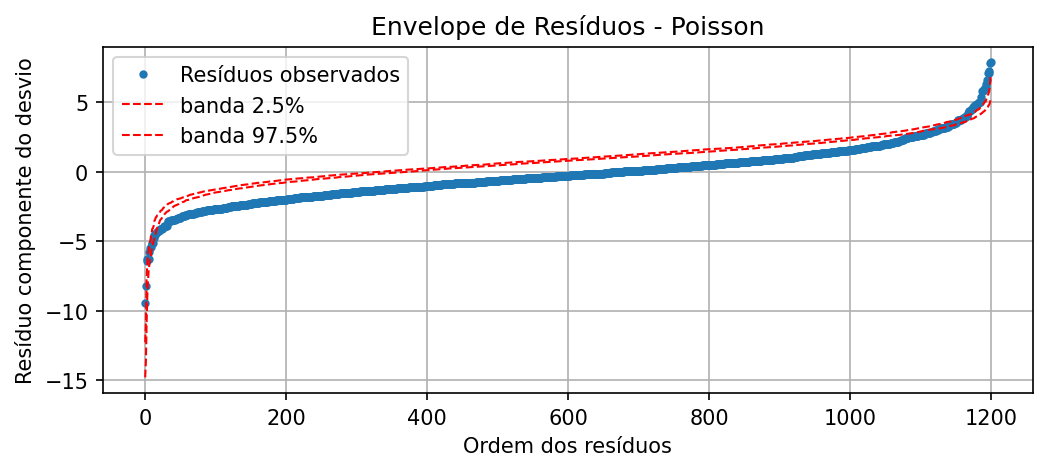

In [111]:
results = ajuste_pois
X = preditoras
plt.figure(figsize=(8, 3), dpi=150)
envelope_poisson(results, X, "Envelope de Resíduos - Poisson")

Analisando o envelope dos resíduos, vemos que a grande maioria dos resíduos observados (pontos azuis) estão fora da banda de confiança de 95%. Isso significa que os resíduos observados têm um padrão ou magnitude que não pode ser explicado pelo modelo de Poisson, indicando que esse não é um modelo adequado para os dados trabalhados, fortalecendo a teoria de que os dados sofrem de superdispersão 

# QUESTÃO 4

**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


In [112]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

alpha_fixado = 0.2

#alpha para sneeze1 a sneeze5 = 0.23, 0.3, 0.25,  0.2, 0.2

modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)

ajuste_nb = modelo_nb.fit()
print(ajuste_nb.summary())

alpha_usado = ajuste_nb.family.alpha
print("Alpha usado no modelo:", alpha_usado)

alpha_est = ajuste_nb.params.iloc[-1]
print("Alpha estimado:", alpha_est)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1194
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3847.2
Date:                Mon, 01 Dec 2025   Deviance:                       1288.8
Time:                        22:22:47   Pearson chi2:                 1.24e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9451
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5615      0.059  

### Quanto ao desvio:
 - Deviance(Poisson) = 4949.1
 - Deviance(Binomial Negativa) = 1288.8

Conclusão: O modelo que utiliza Binomial Negativa tem uma Deviance muito menor (aproximadamente 74% menor), sugerindo que ele captura muito mais da variabilidade dos dados em relação ao modelo de poisson

### Quanto ao AIC

In [113]:
import numpy as np

# N DE PARAMETROS POISSON
k_poi = ajuste_pois.params.shape[0]  

ll_nb = ajuste_nb.llf                       # LOG-VEROSSIMILHANÇA BIN NEGATIVA
k_nb = ajuste_nb.params.shape[0]            # N DE PARAMETROS BIN NEGATIVA

def calcular_aic(LL, k):
    return -2 * LL + 2 * k

# AIC POISSON
aic_poi = calcular_aic(ll_poi, k_poi)

# AIC BIN NEGATIVA
aic_nb = calcular_aic(ll_nb, k_nb)

# RESULTADOS
print("Comparação de AIC".upper())
print(f"Modelo Poisson: LL={ll_poi:.4f}, k={k_poi}, AIC={aic_poi:.4f}")
print(f"Modelo Binomial Negativo: LL={ll_nb:.4f}, k={k_nb}, AIC={aic_nb:.4f}")

COMPARAÇÃO DE AIC
Modelo Poisson: LL=-4947.1390, k=6, AIC=9906.2780
Modelo Binomial Negativo: LL=-3847.1881, k=6, AIC=7706.3762


Sabendo que o AIC mede o compromisso entre o ajuste do modelo aos dados e a parcimônia, o fato do modelo Binomial Negativo apresentar um AIC muito menor indica que ele é significativamente melhor em termos de qualidade de ajuste em relação à sua complexidade

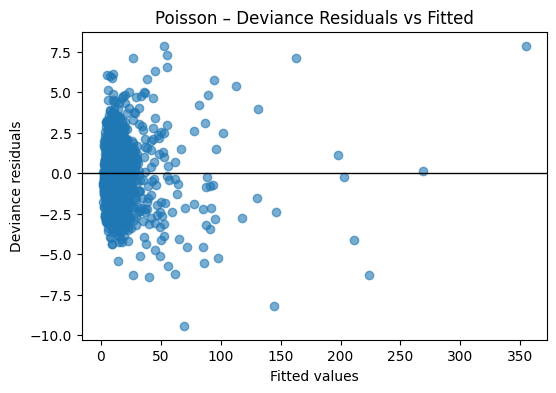

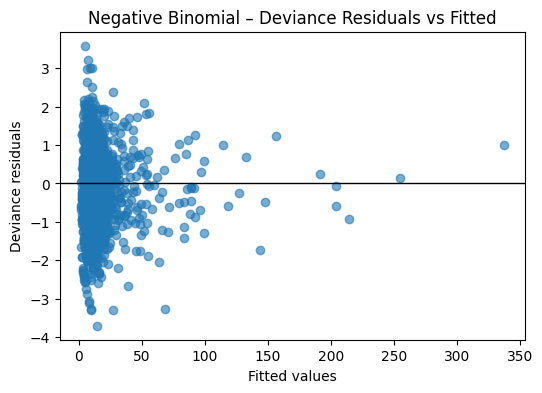

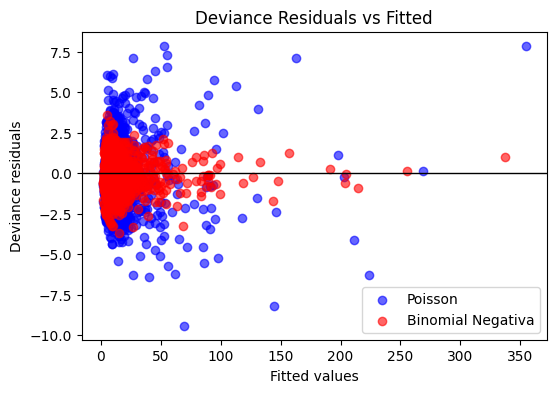

In [114]:
# FUNÇÃO PARA GRÁFICO DE DISPERSÃO DOS RESIDUOS
def plot_deviance_residuals(model, title):
    fitted = model.fittedvalues
    resid = model.resid_deviance

    plt.figure(figsize=(6,4))
    plt.scatter(fitted, resid, alpha=0.6)
    plt.axhline(0, color="black", linewidth=1)
    plt.xlabel("Fitted values")
    plt.ylabel("Deviance residuals")
    plt.title(title)
    plt.show()

plot_deviance_residuals(ajuste_pois, "Poisson – Deviance Residuals vs Fitted")
plot_deviance_residuals(ajuste_nb, "Negative Binomial – Deviance Residuals vs Fitted")

# GRÁFICO COMBINANDO DISPERSÃO DOS DESVIOS DE AMBOS OS MODELOS
plt.figure(figsize=(6,4))
plt.scatter(ajuste_pois.fittedvalues, ajuste_pois.resid_deviance, alpha=0.6, color="blue", label="Poisson")
plt.scatter(ajuste_nb.fittedvalues, ajuste_nb.resid_deviance, alpha=0.6, color="red", label="Binomial Negativa")
plt.axhline(0, color="black", linewidth=1)
plt.xlabel("Fitted values")
plt.ylabel("Deviance residuals")
plt.title("Deviance Residuals vs Fitted")
plt.legend()
plt.show()

### Quanto ao gráficos de resíduos componentes do desvio

Analisando os gráficos de resíduos componentes do desvio, percebemos que o modelo binomial apresenta uma dispersão bem menor, de modo que os resíduos estão muito mais concentrados em torno da linha zero. Sendo assim, o modelo Binomial Negativa descreve muito melhor o número de espirros


In [115]:
def envelope_negbin(fitted_model, title):
    # resíduos observados
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    # matriz de design e parâmetros do próprio modelo
    X = fitted_model.model.exog
    mu = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
    alpha = fitted_model.family.alpha

    sim_resid = []
    for _ in range(100):
        # simula Y ~ NB(mu, alpha) com a mesma parametrização
        n_sim = 1 / alpha
        p_sim = n_sim / (n_sim + mu)
        y_sim = np.random.negative_binomial(n=n_sim, p=p_sim)

        sim_model = sm.GLM(
            y_sim,
            X,
            family=sm.families.NegativeBinomial(alpha=alpha)
        ).fit()

        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, "o", label="Resíduos observados")
    plt.plot(lower, "r--", linewidth=1, label="banda 2.5%")
    plt.plot(upper, "r--", linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)


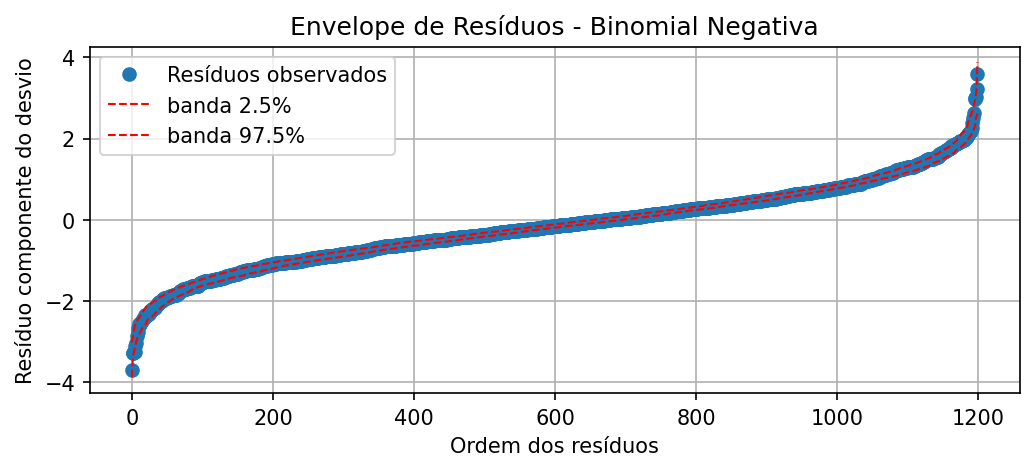

In [116]:
results_nb = ajuste_nb

plt.figure(figsize=(8, 3), dpi=150)
envelope_negbin(results_nb, "Envelope de Resíduos - Binomial Negativa")

A análise do gráfico de Envelope de Resíduos da Binomial Negativa reforça a ideia que esse modelo é significativamente superior para prever nsneeze em relação ao modelo que utiliza Poisson

# QUESTÃO 5

**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


In [117]:
# FUNÇÃO DE CALCULO DO EFEITO MEDIO MARGINAL
def efeito_medio_marginal(modelo, df, var):
    """
    Average marginal effect for a binary variable (difference in predictions).
    var must be coded 0/1 or at least settable to 0/1.
    """
    df1 = df.copy()
    df0 = df.copy()
    df1[var] = 1
    df0[var] = 0
    mu1 = modelo.predict(df1)
    mu0 = modelo.predict(df0)
    ame = np.mean(mu1 - mu0)
    return ame

# Considerando o MODELO BINOMIAL NEGATIVA
print('efeito médio marginal - alcohol'.upper(), efeito_medio_marginal(ajuste_nb, df, 'alcohol'))
print('efeito médio marginal - antihist'.upper(), efeito_medio_marginal(ajuste_nb, df, 'antihist'))

EFEITO MÉDIO MARGINAL - ALCOHOL 3.7990552236800537
EFEITO MÉDIO MARGINAL - ANTIHIST -9.366961638193306


### Considerando o MODELO BINOMIAL NEGATIVA

O efeito médio marginal mede o impacto médio que uma variável explicativa tem sobre o valor esperado da variável resposta, mantendo todas as demais variáveis constantes. Como as variáveis sendo analisadas são binárias, essa medida corresponde à diferença média entre o número previsto de espirros quando a variável vale 1 e quando vale 0, mantendo o restante do perfil de cada indivíduo exatamente igual.

De acordo com os valores de erro médio marginal encontrados para as variáveis 'alcohol' e 'antihist', podemos concluir que:
- Em média, indivíduos que consumiram álcool apresentam 3.8 espirros a mais do que apresentariam caso não tivessem consumido álcool, mantendo todas as demais características constantes
- Em média, um indivíduo que usou anti-histamínico apresenta 9.37 espirros a menos do que teria apresentado caso não tivesse usado o medicamento

# QUESTÃO 6

**6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (desvio, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).



In [118]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

#DIVISÃO TREINO-TESTE
train_df, test_df = train_test_split(df, test_size=0.20, random_state=2024)

#AJUSTE DE MODELOS COM DADOS DE TREINO
pois_model = smf.glm(
    formula="nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen",
    data=train_df,
    family=sm.families.Poisson()
).fit()

nb_model = smf.glm(
    formula="nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen",
    data=train_df,
    family=sm.families.NegativeBinomial(alpha=1.0)
).fit()

#PREDIÇÃO DE DADOSDE TESTE
pred_pois = pois_model.predict(test_df)
pred_nb = nb_model.predict(test_df)

y_true = test_df["nsneeze"]

#ANÁLISE DE MÉTRICAS
eqm_pois = mean_squared_error(y_true, pred_pois)
eam_pois = mean_absolute_error(y_true, pred_pois)

eqm_nb = mean_squared_error(y_true, pred_nb)
eam_nb = mean_absolute_error(y_true, pred_nb)

print("Poisson - EQM:", eqm_pois, "  EAM:", eam_pois)
print("Binomial Negativa - EQM:", eqm_nb,  "  EAM:", eam_nb)


Poisson - EQM: 93.70140135774409   EAM: 5.9074373006480965
Binomial Negativa - EQM: 93.56481999184506   EAM: 5.921409446812345


Analisando as métricas EAM e EQM para os modelos de Poisson e Binomial Negativa, vemos valores muito próximos. Enquanto Poisson apresentou EAM menor, ou seja, em média, seus erros são menores, apresentou também um EQM maior, o que indica a presença de erros com grande escala. No entanto, a diferença de desempenho desses modelos levando em consideração as métricas EAM e EQM é muito similar.

Isso vai contra às analises anteriores, que indicavam superioridade do modelo Binomial Negativa para compreender os dados e realizar predições de 'nsneeze', um comportamento bastante curioso. Isso pode indicar que a Binomial Negativa é superior para inferência, mas não necessariamente para fazer previsões nesse contexto.

# QUESTÃO 7

**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.

Primeiramente, vamos definir um valor correspondente a um dia de baixa e alta concentração de pólen. Para isso, utilizaremos como referência os valores do 1º Quartil (alta concentração) e o 3º Quartil (baixa concentração)

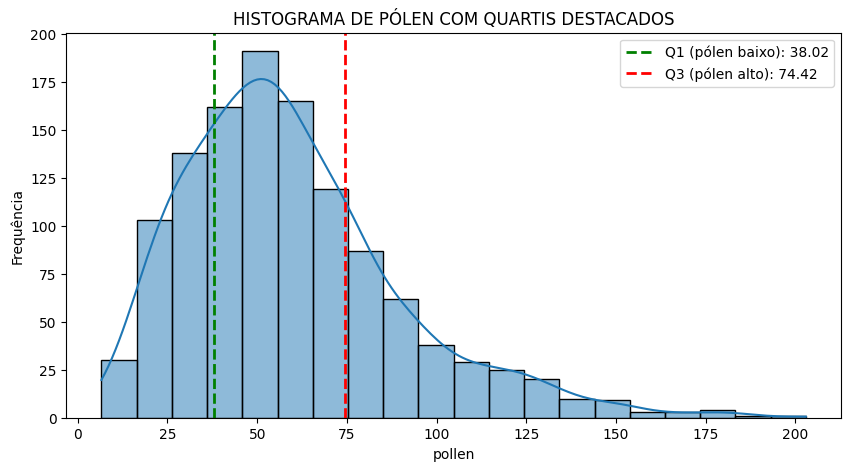

Valor de 'pollen' em um dia de baixa concentração: 38.01715483899591
Valor de 'pollen' em um dia de alta concentração: 74.41640872532909


In [119]:
# DEFINIÇÃO DOS VALORES COM BASE NOS QUANTIS
pollen_baixo = df["pollen"].quantile(0.25)
pollen_alto  = df["pollen"].quantile(0.75)

# HISTOGRAMA COM VALORES ESTABELECIDOS
plt.figure(figsize=(10, 5))
sns.histplot(df["pollen"], bins=20, kde=True)
plt.axvline(pollen_baixo, color="green", linestyle="--", linewidth=2, label=f'Q1 (pólen baixo): {pollen_baixo:.2f}')
plt.axvline(pollen_alto, color="red", linestyle="--", linewidth=2, label=f'Q3 (pólen alto): {pollen_alto:.2f}')
plt.title("Histograma de Pólen com Quartis Destacados".upper())
plt.xlabel("pollen")
plt.ylabel("Frequência")
plt.legend()
plt.show()

print("Valor de 'pollen' em um dia de baixa concentração:", pollen_baixo)
print("Valor de 'pollen' em um dia de alta concentração:", pollen_alto)

Com esses valores definidos, vamos agora fazer a previsão utilizando o **Modelo Binomial Negativa**, considerado superior ao modelo de Poisson nas análises anteriores

In [120]:
# CRIAND ENTRADAS DOS INDIVIDUOS
individuo_A = pd.DataFrame({
    "alcohol": [0],
    "antihist": [1],
    "smoker": [0],
    "age": [30],
    "pollen": [pollen_baixo]
})

individuo_B = pd.DataFrame({
    "alcohol": [1],
    "antihist": [0],
    "smoker": [1],
    "age": [50],
    "pollen": [pollen_alto]
})


# Previsões usando o modelo escolhido (Binomial Negativa)
pred_A = ajuste_nb.predict(individuo_A)[0]
pred_B = ajuste_nb.predict(individuo_B)[0]

print(f"Indivíduo A - espirros esperados: {pred_A:.2f}")
print(f"Indivíduo B - espirros esperados: {pred_B:.2f}")

Indivíduo A - espirros esperados: 4.16
Indivíduo B - espirros esperados: 30.03
